Zillow Project

# OBJECTIVE
- Predicting the values of single unit properties 

     Constraints -
           Only use those whose last transaction was during May and June in 2017 aka the "hot            months" (in terms of real estate demand)
           
     Additional (side information) -
           - To know what states and counties these are located in
           - to know the distribution of tax rates for each county


Contents and Sections
  PROJECT PLANNING & README
  ACQUIRE
  PREP
  SPLIT & SCALE
  DATA EXPLORATION
  FEATURE SELECTION
  MODELING & EVALUATION
  
  

#  PROJECT PLANNING & README

Initial thoughts about the data. Will select just square feet, bedroom and bathroom 
to test relationship to tax value. 
 - Bedroom and bathroom seem very closely entwined, thinking of combining the two as a
    single co-efficient, ie something like 1.025 for 1 bedroom and 2.5 baths.
 - square foot will have a weaker dependence (greater variance) to bedroom and bathroom
 - README.md file contains brief description of project and notes for various dependent files
    as well as how to create the env.py file for the 'accessing the server' function

#  ACQUIRE - this section creates a dataframe ready to prepare

In [90]:
# import necessary modules, python scripts and functions

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
# %matplotlib inline # only for JNB, not for native python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env  # see README notes for creating this file
import wrangle_project # this became the catch-all functions folders
                       # it handles more than just wrangling

from scipy import stats
from math import sqrt

- please note, for this project "wrangle_project" took on the roles of all
    the acquire.py, prep.py, split_scale.py  model.py

In [43]:
# this will create a Pandas Dataframe
zillow_baseline = wrangle_project.wrangle_zillow_bl()
# the "BEGINNING OF BASELINE.." text just shows it's running


 
 
 
 
BEGINNING OF BASELINE WRANGLE OUTPUTS


In [44]:
# confirming data type
type(zillow_baseline)

pandas.core.frame.DataFrame

In [45]:
zillow_baseline.shape
# note - was (15052, 4) prior to removing nulls
   # appears to have removed only 52 rows (only 0.35 %)
    # preferred rewriting SQL script to remove the nulls

(15000, 4)

In [46]:
zillow_baseline.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
0,1458.0,3.0,2.0,136104.0
1,1421.0,2.0,1.0,35606.0
2,2541.0,4.0,3.0,880456.0
3,1650.0,3.0,2.0,614000.0
4,693.0,2.0,1.0,274237.0


In [47]:
zillow_baseline.dtypes

calculatedfinishedsquarefeet    float64
bedroomcnt                      float64
bathroomcnt                     float64
taxvaluedollarcnt               float64
dtype: object

In [48]:
zillow_baseline.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
count,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,1942.856933,3.316067,2.328933,5.414695e+05
std,1001.032811,0.936497,1.019071,7.307493e+05
min,300.000000,1.000000,1.000000,1.050400e+04
25%,1276.000000,3.000000,2.000000,1.988120e+05
50%,1680.000000,3.000000,2.000000,3.849485e+05
75%,2346.000000,4.000000,3.000000,6.449432e+05
max,15450.000000,12.000000,11.000000,2.385837e+07


# Baseline

REMEMBER use only 
   square feet, number of bedrooms, and number of bathrooms 
            to estimate the properties assessed value, 'taxvaluedollarcnt'. 

# BASELINE wrangle

    NOTE on SQL at this stage:
    SELECT calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt, taxvaluedollarcnt
    FROM properties_2017
    WHERE propertylandusetypeid IN (261, 262, 273, 275, 279)

Baseline WRANGLE X and TARGET 
    aka separating X and y

In [49]:
bl_X, bl_y = wrangle_project.bl_sort_X_y(zillow_baseline)

In [50]:
bl_X.shape, type(bl_X)

((15000, 3), pandas.core.frame.DataFrame)

In [51]:
bl_y.shape, type(bl_y)

((15000, 1), pandas.core.frame.DataFrame)

ONLY DO THE asterix FOR THE BASELINE

**scale data

no - explore for any visual
no - evaluate
   Q2. Compute evaluation metrics for a baseline model
      3. Coefficient of Determination and the F-test
   Q3. Are our features valuable? The T-test for feature significance
   Q4. How much confidence do we have in our results?
       Parameters and confidence
no - Feature Engineering

**Modeling with Regression Algorithms


# BASELINE Split
- creating X_train, X_test, y_train, y_test

In [52]:
X_train, X_test, y_train, y_test = wrangle_project.split_data(bl_X, bl_y, train_pct=.75, random_seed=42)

In [53]:
print("X_t shapes and types\n", "-" * 6 )
X_train.shape, type(X_train), X_test.shape, type(X_test)

X_t shapes and types
 ------


((11250, 3),
 pandas.core.frame.DataFrame,
 (3750, 3),
 pandas.core.frame.DataFrame)

In [54]:
print("y_t shapes and types\n", "-" * 6 )
y_train.shape, type(y_train), y_test.shape, type(y_test)

y_t shapes and types
 ------


((11250, 1),
 pandas.core.frame.DataFrame,
 (3750, 1),
 pandas.core.frame.DataFrame)

# BASELINE Scale

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import math

In [56]:
   # call the Scaler (make obj/fit/transform/ all at once)
Xscaler, Xtrain_scaled, Xtest_scaled = wrangle_project.standard_scaler(X_train, X_test)

In [57]:
Xtrain_scaled.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt
7410,-0.328020,-0.331221,-0.321915
10894,-0.542461,-0.331221,-1.298203
1934,0.347073,-0.331221,-0.321915
11539,1.057906,-0.331221,0.654374
2952,0.981462,0.730687,0.654374


In [58]:
# check types
type(Xscaler), type(Xtrain_scaled), type(Xtest_scaled)

(sklearn.preprocessing.data.StandardScaler,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [59]:
import math

print("Mean:") 
print(Xscaler.mean_)
print("Standard Deviation:")
print([math.sqrt(i) for i in Xscaler.var_])

Mean:
[1940.40435556    3.31191111    2.32973333]
Standard Deviation:
[1007.2686155070422, 0.9417007739480312, 1.0242874683299497]


1 & 2 Create Object and Fit to Data
This takes the steps of the Fx individually

# BASELINE Model

In [60]:
# run linear regression model Fx

In [61]:
# reassessing inputs
print("X_t shapes and types\n", "-" * 6 )
X_train.shape, type(X_train), X_test.shape, type(X_test)

X_t shapes and types
 ------


((11250, 3),
 pandas.core.frame.DataFrame,
 (3750, 3),
 pandas.core.frame.DataFrame)

In [62]:
print("y_t shapes and types\n", "-" * 6 )
y_train.shape, type(y_train), y_test.shape, type(y_test)

y_t shapes and types
 ------


((11250, 1),
 pandas.core.frame.DataFrame,
 (3750, 1),
 pandas.core.frame.DataFrame)

In [63]:
  # call Fx
predictions_train,predictions_test = wrangle_project.modeling_function_lr_bl(X_train,X_test,y_train,y_test)

In [64]:
type(predictions_train),type(predictions_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [65]:
model_train,model_test=wrangle_project.modeling_function_lr_bl(X_train,X_test,y_train,y_test)

In [66]:
print(model_test.head())
print(model_train.head())

     actual            lm2
0  510433.0  440866.810735
1  403872.0  241277.494339
2  241209.0  340274.862204
3  663144.0  739585.278976
4  183883.0  163336.441130
     actual           lm1
0  573616.0  4.157153e+05
1  320000.0  2.561901e+05
2  573909.0  7.412817e+05
3  813831.0  1.140194e+06
4  923877.0  9.511667e+05


# BASELINE Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score



lm1 = LinearRegression()

print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [68]:
lm1.fit(X_train, y_train)
print("Linear Model:", lm1)

lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [-10846.14131993]
coefficients:  [[    478.7741327  -152161.63303668   56109.97815439]]


In [69]:
print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

taxvaluedollarcnt = b + m1 * calculatedfinishedsquarefeet + m2 * bedroomcnt
    y-intercept  (b): -10846.14
    coefficient (m1): 478.77
    coefficient (m2): -152161.63


IN-SAMPLE PREDICTION

In [70]:
y_pred_lm1 = lm1.predict(X_train)
type(y_pred_lm1)

numpy.ndarray

TRAIN/IN-SAMPLE EVALUATIONS

In [71]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in tax value can be explained by square feet, and bath and bedroom counts.'.format(r2_lm1))

linear model
  mean squared error: 3.06e+11
  40.25% of the variance in tax value can be explained by square feet, and bath and bedroom counts.


Establish Baseline

In [72]:
from math import sqrt

y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)

print('mean squared error\n model: {:.5}'.format(MSE))
print('  {:.2%} of the variance in tax value can be explained by square feet, and bath and bedroom counts.'.format(evs))

mean squared error
 model: 5.1234e+11
  0.00% of the variance in tax value can be explained by square feet, and bath and bedroom counts.


Sample vs baseline comparison

sample = mean squared error: 3.06e+11 | baseline = model: 5.7639e+15

so the model is better

# Making a pair plot for baseline/MVP
- initial features 
    calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

seaborn.jointplot

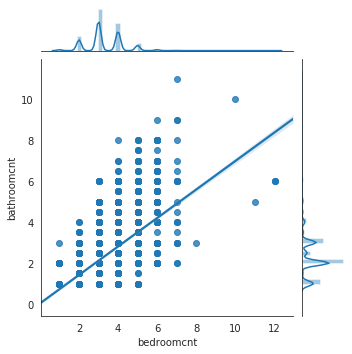

In [74]:
# calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt

with sns.axes_style('white'):
    j = sns.jointplot("bedroomcnt", "bathroomcnt", data=X_train, kind='reg', height=5);
plt.show()

In [75]:
#pd.cut(X_train)

TypeError: cut() missing 1 required positional argument: 'bins'

In [77]:
# plt.subplot(121)
# sns.catplot(x="bedroomcnt", kind="count", palette="ch:.25", data=X_train)
# plt.subplot(122)
# sns.catplot(x="bathroomcnt", kind="count", palette="ch:.25", data=X_train)
#plt.show()



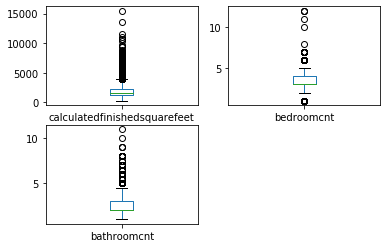

In [78]:
X_train.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

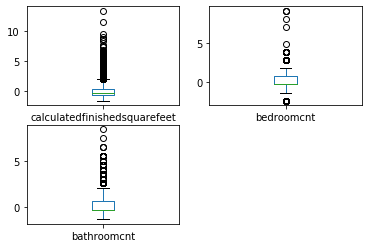

In [79]:
Xtrain_scaled.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

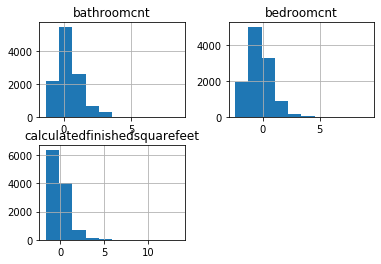

In [80]:
Xtrain_scaled.hist()
plt.show()

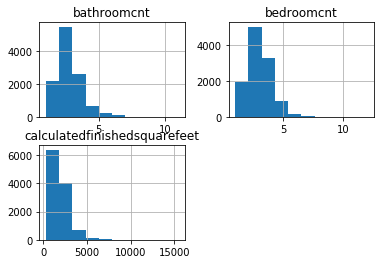

In [81]:
X_train.hist()
plt.show()

In [82]:
X_train.groupby('bathroomcnt')['bathroomcnt'].count()

bathroomcnt
1.0     2002
1.5      177
2.0     4610
2.5      868
3.0     2351
3.5      236
4.0      506
4.5      149
5.0      173
5.5       50
6.0       78
6.5       13
7.0       16
7.5        4
8.0       12
9.0        3
10.0       1
11.0       1
Name: bathroomcnt, dtype: int64

In [83]:
b_room_ct = X_train.groupby('bathroomcnt')['bathroomcnt'].count()

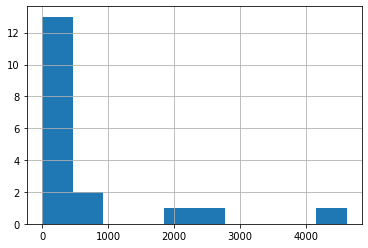

In [84]:
b_room_ct.hist()
plt.show()

In [86]:

# bins = [x*.5 for x in range(0,23)]
# ax.hist(X_train, bins, orientation='horizontal')
# #ax.set_ylim([-5, 5])
# plt.show()

In [87]:
# bathroom_count = pd.cut(X_test.bathroomcnt,bins=[0,1,2,3,4,5,6,7,8,9,10])
pd.cut(X_test.bathroomcnt,bins=[0,1,2,3,4,5,6,7,8,9,10])

11499    (2, 3]
6475     (1, 2]
13167    (1, 2]
862      (2, 3]
5970     (1, 2]
6706     (1, 2]
3017     (1, 2]
3781     (0, 1]
3898     (1, 2]
2250     (2, 3]
542      (2, 3]
4351     (2, 3]
12807    (2, 3]
6631     (1, 2]
6705     (1, 2]
6978     (0, 1]
7399     (3, 4]
11119    (4, 5]
12665    (2, 3]
5304     (1, 2]
2312     (1, 2]
7040     (1, 2]
1889     (1, 2]
8991     (2, 3]
169      (1, 2]
1795     (3, 4]
3975     (1, 2]
6820     (1, 2]
7826     (1, 2]
11809    (1, 2]
          ...  
14499    (2, 3]
14297    (2, 3]
10918    (1, 2]
1119     (0, 1]
11925    (0, 1]
8629     (3, 4]
11899    (1, 2]
14759    (2, 3]
12786    (2, 3]
13010    (2, 3]
2186     (1, 2]
9671     (6, 7]
10770    (4, 5]
14818    (2, 3]
3997     (1, 2]
4935     (0, 1]
14420    (2, 3]
1432     (2, 3]
4785     (0, 1]
11028    (1, 2]
6021     (2, 3]
4902     (0, 1]
2174     (2, 3]
6388     (0, 1]
3941     (0, 1]
2102     (1, 2]
13903    (1, 2]
11863    (2, 3]
2656     (0, 1]
7250     (1, 2]
Name: bathroomcnt, Lengt

(array([0.000e+00, 0.000e+00, 2.002e+03, 1.770e+02, 4.610e+03, 8.680e+02,
        2.351e+03, 2.360e+02, 5.060e+02, 1.490e+02, 1.730e+02, 5.000e+01,
        7.800e+01, 1.300e+01, 1.600e+01, 4.000e+00, 1.200e+01, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. ]),
 <a list of 22 Patch objects>)

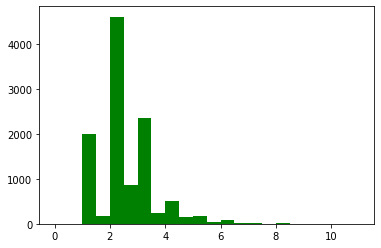

In [88]:
plt.hist(X_train.bathroomcnt, bins = [x*.5 for x in range(0,23)], color = 'green')

# TAX RATE SECTION

In [91]:
tax_county_data = wrangle_project.wrangle_zillow_tax_amounts()

AttributeError: module 'wrangle_project' has no attribute 'wrangle_zillow_tax_amounts'